In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [23]:
class PidController:
    def __init__(self, kp, ki, kd):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.integral_result = 0
    
    def proportional(self, err):
        return self.kp * err
    
    def derivative(self, err, dt):
        return self.ki * (err / dt)
    
    def integral(self, err, dt):
        self.integral_result += self.kd * (err * dt)
        return self.integral_result
    
    def result(self, err, err_prev, dt):
        return self.proportional(err)+self.integral(err, dt)+self.derivative(err - err_prev, dt)
    
class Move:
    def __init__(self, current, target):
        self.current=current
        self.target=target
        self.error=self.target-self.current
        self.error_prev=self.error
        

# mixed motors algorithm
class MMA:
    def __init__(self):
        self.front_right = 0.0
        self.front_left = 0.0
        self.back_right = 0.0
        self.back_left = 0.0
        
    def __str__(self):
        return "%.2f %.2f %.2f %.2f"%(self.front_right, self.front_left, self.back_right, self.back_left)
    
    def update(self, pitch, roll, yaw, thrust):
        self.front_right = thrust + roll + pitch + yaw
        self.front_left = thrust - roll + pitch - yaw
        self.back_right = thrust + roll - pitch - yaw
        self.back_left = thrust - roll - pitch + yaw
        
        
        
    
def simulate(kp, ki, kd):
    duration = 1000
    delta_t = 10
    err = 0.0
    err_prev = 0.0
    result = 0.0
    pitch = Move(-10, 5)
    roll = Move(10, -20)
    yaw = Move(-20, 10)
    thrust = Move(0, 5)
    pitch_pid = PidController(kp, ki, kd)
    roll_pid = PidController(kp, ki, kd)
    yaw_pid = PidController(kp, ki, kd)
    thrust_pid = PidController(kp, ki, kd)
    mma = MMA()

    pitch_dict = {}
    roll_dict = {}
    yaw_dict = {}
    thrust_dict = {}
    mma_dict={}
    
    for t in range(0, duration, delta_t):
        
        mma.update(pitch.current, roll.current,yaw.current,thrust.current)
        
        pitch_dict[t] = {'error': pitch.error, 'current': pitch.current}
        roll_dict[t] =  {'error': roll.error, 'current': roll.current}
        yaw_dict[t] =  {'error': yaw.error, 'current': yaw.current}
        thrust_dict[t] =  {'error': thrust.error, 'current': thrust.current}
        mma_dict[t] = {'front_right': mma.front_right, 'front_left': mma.front_left, 'back_right': mma.back_right,'back_left': mma.back_left }
        
        pitch.current = pitch_pid.result(pitch.error, pitch.error_prev, delta_t)
        roll.current = roll_pid.result(roll.error, roll.error_prev, delta_t)
        yaw.current = yaw_pid.result(yaw.error, yaw.error_prev, delta_t)
        thrust.current = thrust_pid.result(thrust.error, thrust.error_prev, delta_t)
        
        pitch.error_prev = pitch.error
        roll.error_prev = roll.error
        yaw.error_prev = yaw.error
        thrust.error_prev = thrust.error
        
        pitch.error = pitch.target - pitch.current
        roll.error = roll.target - roll.current
        yaw.error = yaw.target - yaw.current
        thrust.error = thrust.target - thrust.current

        
    p = {'t': pitch_dict.keys(), 'error': [x['error'] for x in pitch_dict.values()], 'current': [x['current'] for x in pitch_dict.values()]}
    r = {'t': roll_dict.keys(), 'error': [x['error'] for x in roll_dict.values()], 'current': [x['current'] for x in roll_dict.values()]}
    y = {'t': yaw_dict.keys(), 'error': [x['error'] for x in yaw_dict.values()], 'current': [x['current'] for x in yaw_dict.values()]}
    t = {'t': thrust_dict.keys(), 'error': [x['error'] for x in thrust_dict.values()], 'current': [x['current'] for x in thrust_dict.values()]}
    m = {'t': mma_dict.keys(), 'front_right': [x['front_right'] for x in mma_dict.values()], 'front_left': [x['front_left'] for x in mma_dict.values()], 'back_right': [x['back_right'] for x in mma_dict.values()],'back_left': [x['back_left'] for x in mma_dict.values()]}
    
    y_lim = [-40,40]

    
    plt.plot(p['t'], p['error'])
    plt.plot(p['t'], p['current'])
    plt.legend(['pitch_error', 'pitch_current'])
    plt.ylim(y_lim)
    plt.show()
    
    plt.plot(r['t'], r['error'])
    plt.plot(r['t'], r['current'])
    plt.legend(['roll_error', 'roll_current'])
    plt.ylim(y_lim)

    plt.show()
    
    plt.plot(y['t'], y['error'])
    plt.plot(y['t'], y['current'])
    plt.legend(['yaw_error', 'yaw_current'])
    plt.ylim(y_lim)

    plt.show()
    
    plt.plot(t['t'], t['error'])
    plt.plot(t['t'], t['current'])
    plt.legend(['thrust_error', 'thrust_current'])
    plt.ylim(y_lim)
    
    plt.show()
    
    plt.plot(m['t'], m['front_right'])
    plt.plot(m['t'], m['front_left'])
    plt.plot(m['t'], m['back_right'])
    plt.plot(m['t'], m['back_left'])
    
    plt.show()

In [24]:
# for kp in np.arange(1, 2, 1):
#     for ki in np.arange(0,0.1, 0.001):
#         for kd in np.arange(-2, -1, 0.1):
#             simulate(0, 40, kp, ki, kd)

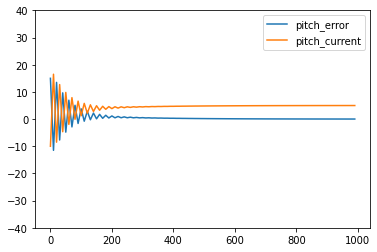

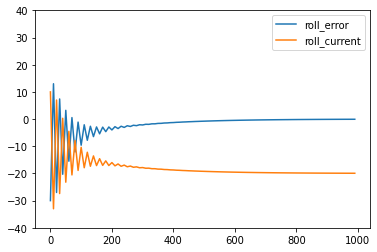

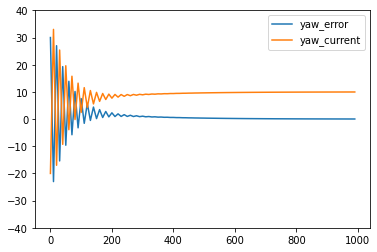

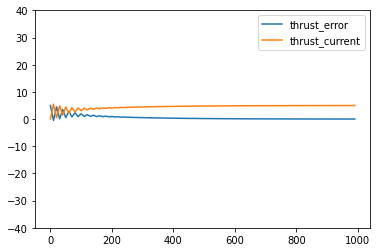

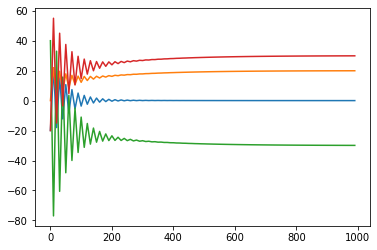

In [25]:
simulate(1, -1, 0.01)

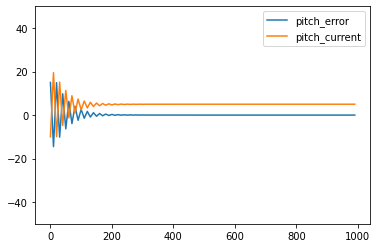

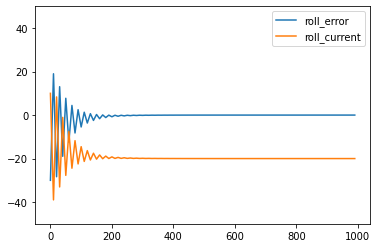

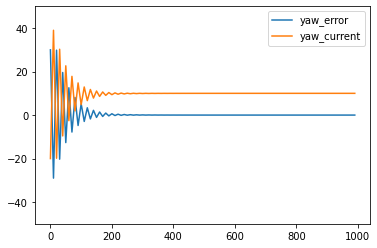

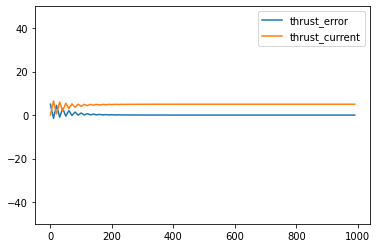

In [6]:
simulate(1, -1.5, 0.03)